In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

df = pd.read_csv('Life Expectancy Data.csv')

In [129]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [130]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [131]:
print("Data set size: ", len(df))

print("\nAmount of NaN values in different columns: ")
print(df.isna().sum())

Data set size:  2938

Amount of NaN values in different columns: 
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [132]:
#usuwanie dodatkowych znaków w nazwach kolumn
df.columns = df.columns.str.strip()

df = df.drop(['Hepatitis B', 'Population', 'GDP'], axis=1)
df = df.dropna()

print("Data set size after modifications: ", len(df))

#Data set stracił ok. 400 wartości, co jest bardzo dużą ilością. 2550 to jednak powinno być wystarczająco dużo, aby wymodelować life expectation

Data set size after modifications:  2556


In [133]:
#Użycie One-Hot-Encoding, żeby zmienną kategoryczną "status" zamienić na zmienną numeryczną
df = pd.get_dummies(df, columns=['Status'], drop_first=True)

In [134]:
X = df.drop(columns=['Country', 'Year', 'Life expectancy'])
y = df['Life expectancy']

#podział na zbiór testowy i treningowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

#wyliczenie spodziewanych cen na podstawie wytrenowanego modelu
y_exp = model.predict(X_test)

#wyliczenie parametrów oceny modelu
r2 = r2_score(y_test, y_exp)
mse = mean_squared_error(y_test, y_exp)

print("Mean squared error of fitting: ", mse)
print("R^2 parameter of fitting: ", r2)

Mean squared error of fitting:  14.466786933748434
R^2 parameter of fitting:  0.8251853848909814


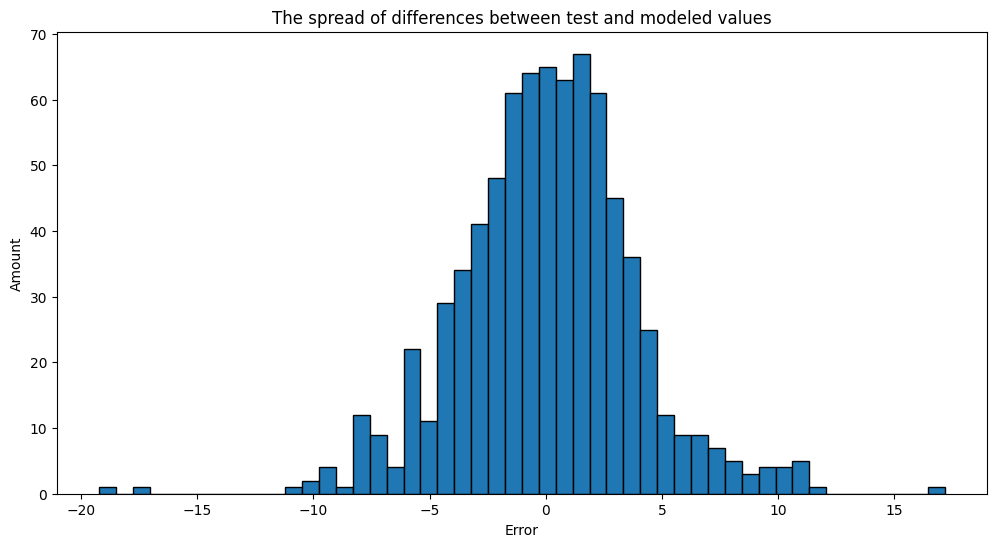

In [135]:
errors = y_exp - y_test

plt.figure(figsize=(12, 6))
plt.hist(errors, bins = 50, edgecolor='black')

plt.title('The spread of differences between test and modeled values')
plt.xlabel('Error')
plt.ylabel('Amount')

plt.show()

In [136]:
mse_list = []

for order in range(1,4):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_exp = model.predict(X_test)
    
    mse_list.append(mean_squared_error(y_test, model.predict(X_test)))
    print("order: ", order, " MSE: ", mean_squared_error(y_test, model.predict(X_test)), " R^2: ", r2_score(y_test, y_exp))

order:  1  MSE:  14.466786933748452  R^2:  0.8251853848909811
order:  2  MSE:  9.076959436285334  R^2:  0.8903153010076682
order:  3  MSE:  60822.3634995352  R^2:  -733.9688713800037


In [137]:
X = df['Income composition of resources'].values.reshape(-1,1)
y = df['Life expectancy'].values.reshape(-1)

#podział na zbiór testowy i treningowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

#wyliczenie spodziewanych cen na podstawie wytrenowanego modelu
y_exp = model.predict(X_test)

#wyliczenie parametrów oceny modelu
r2 = r2_score(y_test, y_exp)
mse = mean_squared_error(y_test, y_exp)

print("Modelling using only one variable")
print("\nMean squared error of fitting: ", mse)
print("R^2 parameter of fitting: ", r2)

Modelling using only one variable

Mean squared error of fitting:  44.61553658331628
R^2 parameter of fitting:  0.46087214172622837


In [138]:
df2 = pd.read_csv('Life Expectancy Data.csv')

#Preprocessing danych, analogiczny do wcześniejszego
df2.columns = df2.columns.str.strip()

df2 = df2.drop(['Hepatitis B', 'Population', 'GDP'], axis=1)
df2 = df2.dropna()

df2 = pd.get_dummies(df2, columns=['Status'], drop_first=True)

In [139]:
X = df2.drop(columns=['Country', 'Year', 'Life expectancy'])
y = df2['Life expectancy']

#dopasowanie danych do wielomianu stopnia 2
poly = PolynomialFeatures(2, include_bias = False)
X_order = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=42)

#użycie standard scalera, aby ustandaryzować wartości zmiennych w modelu
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

model = Ridge(alpha = 0.3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error of fitting with ridge regression:", mse)
print("R^2 parameter of fitting with ridge regression:", r2)

Mean squared error of fitting with ridge regression: 7.788814173114624
R^2 parameter of fitting with ridge regression: 0.90588106688346
